# Analysis of the part 1

In this notebook, we analyse the results for the part 1, which consist in the tables 1 to 3, the sanity checks and the figures.

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import random
import json
import seaborn as sns

In [2]:
def filter_dimensions(dimensions, ndims = 3):
    """
    given a list of dimensions [array, background, residual]
    returns three arrays with nan filtered
    """
    if ndims == 3:
        # extract the values
        array_dimensions = np.array([d[0] for d in dimensions])
        background_dimensions = np.array([d[1] for d in dimensions])
        residual_dimension = np.array([d[2] for d in dimensions])


        # filter the nans
        array_dimensions = array_dimensions[np.logical_not(np.isnan(array_dimensions))]
        background_dimensions = background_dimensions[np.logical_not(np.isnan(background_dimensions))]
        residual_dimension = residual_dimension[np.logical_not(np.isnan(residual_dimension))]

        return array_dimensions, background_dimensions, residual_dimension
    elif ndims == 2:
        # extract the values
        factor_dimension = np.array([d[0] for d in dimensions])
        residual_dimension = np.array([d[1] for d in dimensions])

        # filter the nans
        factor_dimension = factor_dimension[np.logical_not(np.isnan(factor_dimension))]
        residual_dimension = residual_dimension[np.logical_not(np.isnan(residual_dimension))]

        return factor_dimension, residual_dimension
    
def return_mean_and_2sigma(values):
    """
    returns the mean and the 95% confidence interval
    of a given series.
    """
    
    mean = np.mean(values)
    std = np.std(values)
    
    return mean, (mean - 1.96 * std,mean + 1.96 * std)

## Tables

In [3]:
# Open the files to generate the tables 1, 2 and 3

with open('results/table_1.json') as f:
    table_1 = json.load(f)

with open('results/table_2.json') as f:
    table_2 = json.load(f)
    
with open('results/table_3.json') as f:
    table_3 = json.load(f)
    
# Load the results that have been recomputed for the table 1/inception part
with open('results/table_1_resnet_pretrained.json') as f:
    table_1_resnet = json.load(f)

### Table 1

In [4]:
# Table 1 displays per model the dimensionality estimates for the array and the background

inception_array, inception_background, inception_residual = filter_dimensions(table_1['inception'])
resnet_pre_array, resnet_pre_background, resnet_pre_resid = filter_dimensions(table_1_resnet['resnet_pretrained'])
resnet_rand_array, resnet_rand_background, resnet_rand_resid = filter_dimensions(table_1['resnet_random'])

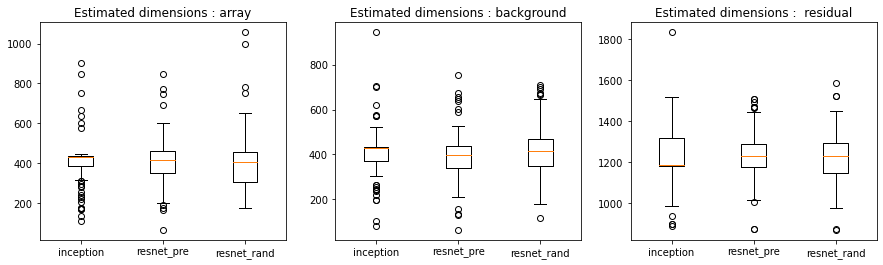

In [5]:
fig, ax = plt.subplots(1,3, figsize = (15, 4))

ax[0].boxplot([inception_array, resnet_pre_array, resnet_rand_array])
ax[0].set_title('Estimated dimensions : array')
ax[0].set_xticks([1,2,3]) # values
ax[0].set_xticklabels(['inception', 'resnet_pre', 'resnet_rand']) # labels


ax[1].boxplot([inception_background, resnet_pre_background, resnet_rand_background])
ax[1].set_title('Estimated dimensions : background')
ax[1].set_xticks([1,2,3]) # values
ax[1].set_xticklabels(['inception', 'resnet_pre', 'resnet_rand']) # labels

ax[2].boxplot([inception_residual, resnet_pre_resid, resnet_rand_resid])
ax[2].set_title('Estimated dimensions :  residual')
ax[2].set_xticks([1,2,3]) # values
ax[2].set_xticklabels(['inception', 'resnet_pre', 'resnet_rand']) # labels

plt.savefig('figs/estimated_dimensions.pdf')
plt.show()


In [6]:
print('Table 1')

print('''
Estimated dimensions \n
Inception : {} -- {} -- {}\n
{} -- {} -- {}\n\n
'''.format(return_mean_and_2sigma(inception_array)[0],
           return_mean_and_2sigma(inception_background)[0],
           return_mean_and_2sigma(inception_residual)[0],           
           return_mean_and_2sigma(inception_array)[1],
           return_mean_and_2sigma(inception_background)[1],
           return_mean_and_2sigma(inception_residual)[1]))   

print('''
Estimated dimensions \n
Resnet pre : {} -- {} -- {}\n
{} -- {} -- {}\n\n
'''.format(return_mean_and_2sigma(resnet_pre_array)[0],
           return_mean_and_2sigma(resnet_pre_background)[0],
           return_mean_and_2sigma(resnet_pre_resid)[0],           
           return_mean_and_2sigma(resnet_pre_array)[1],
           return_mean_and_2sigma(resnet_pre_background)[1],
           return_mean_and_2sigma(resnet_pre_resid)[1]))   



print('''
Estimated dimensions \n
Resnet rand : {} -- {} -- {}\n
{} -- {} -- {}\n\n
'''.format(return_mean_and_2sigma(resnet_rand_array)[0],
           return_mean_and_2sigma(resnet_rand_background)[0],
           return_mean_and_2sigma(resnet_rand_resid)[0],           
           return_mean_and_2sigma(resnet_rand_array)[1],
           return_mean_and_2sigma(resnet_rand_background)[1],
           return_mean_and_2sigma(resnet_rand_resid)[1]))   

Table 1

Estimated dimensions 

Inception : 407.68 -- 410.0 -- 1230.32

(169.42704367802693, 645.932956321973) -- (195.460652597245, 624.539347402755) -- (953.22093116692, 1507.41906883308)




Estimated dimensions 

Resnet pre : 414.6 -- 394.58 -- 1238.82

(178.62300010382373, 650.5769998961763) -- (180.4643430158364, 608.6956569841636) -- (1004.668260591214, 1472.9717394087859)




Estimated dimensions 

Resnet rand : 405.25 -- 412.8 -- 1229.95

(116.85394891053033, 693.6460510894697) -- (168.59973084371921, 657.0002691562809) -- (993.3364531097174, 1466.5635468902829)





### Table 2

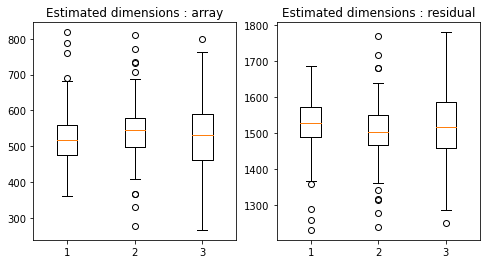

In [7]:
# Table 2 displays per model the dimensionality estimates for the array only

inception_array, inception_residual = filter_dimensions(table_2['inception'], ndims = 2) 
resnet_pre_array, resnet_pre_resid = filter_dimensions(table_2['resnet_pretrained'], ndims = 2)
resnet_rand_array, resnet_rand_resid = filter_dimensions(table_2['resnet_random'], ndims = 2)

fig, ax = plt.subplots(1,2, figsize = (8, 4))

ax[0].boxplot([inception_array, resnet_pre_array, resnet_rand_array])
ax[0].set_title('Estimated dimensions : array')

ax[1].boxplot([inception_residual, resnet_pre_resid, resnet_rand_resid])
ax[1].set_title('Estimated dimensions : residual')

plt.savefig('figs/estimated_dimensions_array.pdf')
plt.show()


In [8]:
print('Table 2')

print('''
Estimated dimensions \n
Inception : {} -- {}\n
{} -- {}\n\n
'''.format(return_mean_and_2sigma(inception_array)[0],
           return_mean_and_2sigma(inception_residual)[0],           
           return_mean_and_2sigma(inception_array)[1],
           return_mean_and_2sigma(inception_residual)[1]))   

print('''
Estimated dimensions \n
Resnet pre : {} -- {}\n
{} -- {}\n\n
'''.format(return_mean_and_2sigma(resnet_pre_array)[0],
           return_mean_and_2sigma(resnet_pre_resid)[0],           
           return_mean_and_2sigma(resnet_pre_array)[1],
           return_mean_and_2sigma(resnet_pre_resid)[1]))   



print('''
Estimated dimensions \n
Resnet rand : {} -- {}\n
{} -- {}\n\n
'''.format(return_mean_and_2sigma(resnet_rand_array)[0],
           return_mean_and_2sigma(resnet_rand_resid)[0],           
           return_mean_and_2sigma(resnet_rand_array)[1],
           return_mean_and_2sigma(resnet_rand_resid)[1]))   

Table 2

Estimated dimensions 

Inception : 525.17 -- 1522.83

(371.8481170942647, 678.4918829057352) -- (1369.5081170942647, 1676.1518829057352)




Estimated dimensions 

Resnet pre : 542.01 -- 1505.99

(374.7962680763329, 709.2237319236671) -- (1338.776268076333, 1673.203731923667)




Estimated dimensions 

Resnet rand : 529.26 -- 1518.74

(323.35444466979527, 735.1655553302047) -- (1312.8344446697952, 1724.6455553302048)





### Table 3

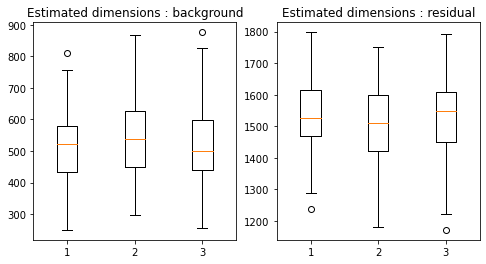

In [9]:
# Table 3 displays per model the dimensionality estimates for the background only

inception_array, inception_residual = filter_dimensions(table_3['inception'], ndims = 2) 
resnet_pre_array, resnet_pre_resid = filter_dimensions(table_3['resnet_pretrained'], ndims = 2)
resnet_rand_array, resnet_rand_resid = filter_dimensions(table_3['resnet_random'], ndims = 2)

fig, ax = plt.subplots(1,2, figsize = (8, 4))

ax[0].boxplot([inception_array, resnet_pre_array, resnet_rand_array])
ax[0].set_title('Estimated dimensions : background')

ax[1].boxplot([inception_residual, resnet_pre_resid, resnet_rand_resid])
ax[1].set_title('Estimated dimensions : residual')

plt.savefig('figs/estimated_dimensions_background.pdf')
plt.show()


In [10]:
print('Table 3')

print('''
Estimated dimensions \n
Inception : {} -- {}\n
{} -- {}\n\n
'''.format(return_mean_and_2sigma(inception_array)[0],
           return_mean_and_2sigma(inception_residual)[0],           
           return_mean_and_2sigma(inception_array)[1],
           return_mean_and_2sigma(inception_residual)[1]))   

print('''
Estimated dimensions \n
Resnet pre : {} -- {}\n
{} -- {}\n\n
'''.format(return_mean_and_2sigma(resnet_pre_array)[0],
           return_mean_and_2sigma(resnet_pre_resid)[0],           
           return_mean_and_2sigma(resnet_pre_array)[1],
           return_mean_and_2sigma(resnet_pre_resid)[1]))   



print('''
Estimated dimensions \n
Resnet rand : {} -- {}\n
{} -- {}\n\n
'''.format(return_mean_and_2sigma(resnet_rand_array)[0],
           return_mean_and_2sigma(resnet_rand_resid)[0],           
           return_mean_and_2sigma(resnet_rand_array)[1],
           return_mean_and_2sigma(resnet_rand_resid)[1]))   

Table 3

Estimated dimensions 

Inception : 513.19 -- 1534.81

(295.487426698167, 730.8925733018332) -- (1317.1074266981668, 1752.512573301833)




Estimated dimensions 

Resnet pre : 544.2 -- 1503.8

(292.2468981417375, 796.1531018582625) -- (1251.8468981417375, 1755.7531018582624)




Estimated dimensions 

Resnet rand : 524.27 -- 1523.73

(290.0747096046549, 758.465290395345) -- (1289.5347096046548, 1757.9252903953452)





## Sanity checks

In [11]:
with open('results/reality_check.json') as f:
    results = json.load(f)
    
with open('results/sanity_check.json') as f:
    sanity = json.load(f)

### Reality check

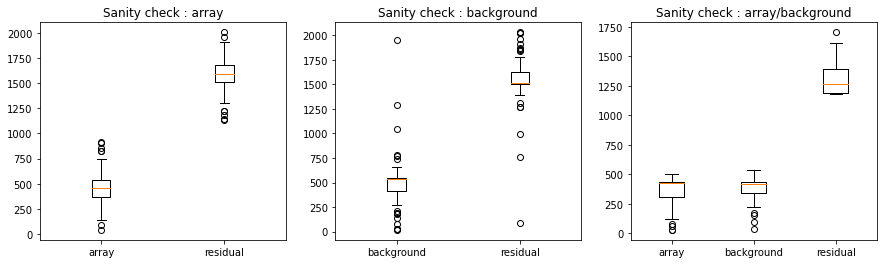

In [12]:
array_dim, resid_dim = filter_dimensions(results['array']['inception'], ndims = 2)
background_dim, resid_dims = filter_dimensions(results['background']['inception'], ndims = 2)
array_dims, background_dims, resid_dimss = filter_dimensions(results['mixed']['inception'])


fig, ax = plt.subplots(1,3, figsize = (15, 4))

ax[0].boxplot([array_dim, resid_dim])
ax[0].set_title('Sanity check : array')
ax[0].set_xticks([1,2]) # values
ax[0].set_xticklabels(['array', 'residual']) # labels


ax[1].boxplot([background_dim, resid_dims])
ax[1].set_title('Sanity check : background')
ax[1].set_xticks([1,2]) # values
ax[1].set_xticklabels(['background', 'residual']) # labels


ax[2].boxplot([array_dims, background_dims, resid_dimss])
ax[2].set_title('Sanity check : array/background')
ax[2].set_xticks([1,2,3]) # values
ax[2].set_xticklabels(['array', 'background', 'residual']) # labels

plt.savefig('figs/reality_check_plot.pdf')
plt.show()


In [13]:
print('Reality check')

print('''
Estimated dimensions \n
Array/residual : {} -- {}\n
{} -- {}\n\n
'''.format(return_mean_and_2sigma(array_dim)[0],
           return_mean_and_2sigma(resid_dim)[0],
           return_mean_and_2sigma(array_dim)[1],
           return_mean_and_2sigma(resid_dim)[1],))


print('''
Estimated dimensions \n
Background/residual : {} -- {}\n
{} -- {}\n\n
'''.format(return_mean_and_2sigma(background_dim)[0],
           return_mean_and_2sigma(resid_dims)[0],
           return_mean_and_2sigma(background_dim)[1],
           return_mean_and_2sigma(resid_dims)[1],))

print('''
Estimated dimensions \n
Array/background/residual : {} -- {} -- {}\n
{} -- {} -- {}\n\n
'''.format(return_mean_and_2sigma(array_dims)[0],
           return_mean_and_2sigma(background_dims)[0],
           return_mean_and_2sigma(resid_dimss)[0],           
           return_mean_and_2sigma(array_dims)[1],
           return_mean_and_2sigma(background_dims)[1],
           return_mean_and_2sigma(resid_dimss)[1]))   

Reality check

Estimated dimensions 

Array/residual : 454.03 -- 1593.97

(142.63288132585427, 765.4271186741457) -- (1282.5728813258543, 1905.3671186741458)




Estimated dimensions 

Background/residual : 494.44 -- 1553.56

(45.350462938357964, 943.529537061642) -- (1104.470462938358, 2002.649537061642)




Estimated dimensions 

Array/background/residual : 355.975 -- 376.275 -- 1315.75

(88.4865222687153, 623.4634777312847) -- (159.28167144126294, 593.268328558737) -- (1053.5943215568277, 1577.9056784431723)





### Sanity check

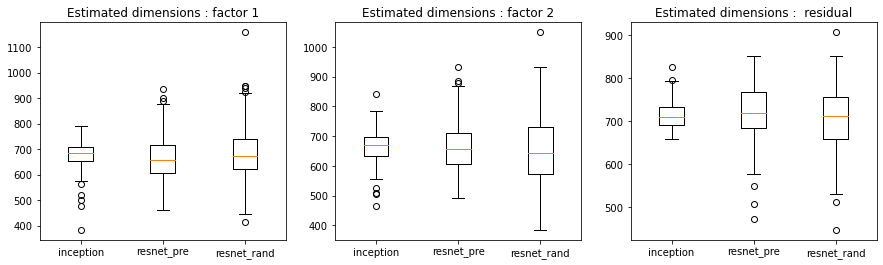

In [14]:
# Mimics table 1, we have three models 

inception_array, inception_background, inception_residual = filter_dimensions(sanity['inception'])
resnet_pre_array, resnet_pre_background, resnet_pre_resid = filter_dimensions(sanity['resnet_pretrained'])
resnet_rand_array, resnet_rand_background, resnet_rand_resid = filter_dimensions(sanity['resnet_random'])

fig, ax = plt.subplots(1,3, figsize = (15, 4))

ax[0].boxplot([inception_array, resnet_pre_array, resnet_rand_array])
ax[0].set_title('Estimated dimensions : factor 1')
ax[0].set_xticks([1,2,3]) # values
ax[0].set_xticklabels(['inception', 'resnet_pre', 'resnet_rand']) # labels


ax[1].boxplot([inception_background, resnet_pre_background, resnet_rand_background])
ax[1].set_title('Estimated dimensions : factor 2')
ax[1].set_xticks([1,2,3]) # values
ax[1].set_xticklabels(['inception', 'resnet_pre', 'resnet_rand']) # labels

ax[2].boxplot([inception_residual, resnet_pre_resid, resnet_rand_resid])
ax[2].set_title('Estimated dimensions :  residual')
ax[2].set_xticks([1,2,3]) # values
ax[2].set_xticklabels(['inception', 'resnet_pre', 'resnet_rand']) # labels

plt.savefig('figs/sanity_check_plot.pdf')
plt.show()

In [15]:
print('Table 2')

print('''
Estimated dimensions \n
Inception : {} -- {}\n
{} -- {}\n\n
'''.format(return_mean_and_2sigma(inception_array)[0],
           return_mean_and_2sigma(inception_residual)[0],           
           return_mean_and_2sigma(inception_array)[1],
           return_mean_and_2sigma(inception_residual)[1]))   

print('''
Estimated dimensions \n
Resnet pre : {} -- {}\n
{} -- {}\n\n
'''.format(return_mean_and_2sigma(resnet_pre_array)[0],
           return_mean_and_2sigma(resnet_pre_resid)[0],           
           return_mean_and_2sigma(resnet_pre_array)[1],
           return_mean_and_2sigma(resnet_pre_resid)[1]))   



print('''
Estimated dimensions \n
Resnet rand : {} -- {}\n
{} -- {}\n\n
'''.format(return_mean_and_2sigma(resnet_rand_array)[0],
           return_mean_and_2sigma(resnet_rand_resid)[0],           
           return_mean_and_2sigma(resnet_rand_array)[1],
           return_mean_and_2sigma(resnet_rand_resid)[1]))   

Table 2

Estimated dimensions 

Inception : 671.04 -- 716.34

(552.5690909740285, 789.5109090259714) -- (651.1092565193375, 781.5707434806626)




Estimated dimensions 

Resnet pre : 664.42 -- 716.4

(483.92151954722715, 844.9184804527728) -- (583.042775313821, 849.7572246861789)




Estimated dimensions 

Resnet rand : 685.96 -- 706.74

(439.36116542562496, 932.5588345743752) -- (543.581420195443, 869.898579804557)





## Figures

In [16]:
with open('results/figure_1.json') as f:
    figure_1 = json.load(f)

with open('results/figure_2.json') as f:
    figure_2 = json.load(f)

### Figure 1

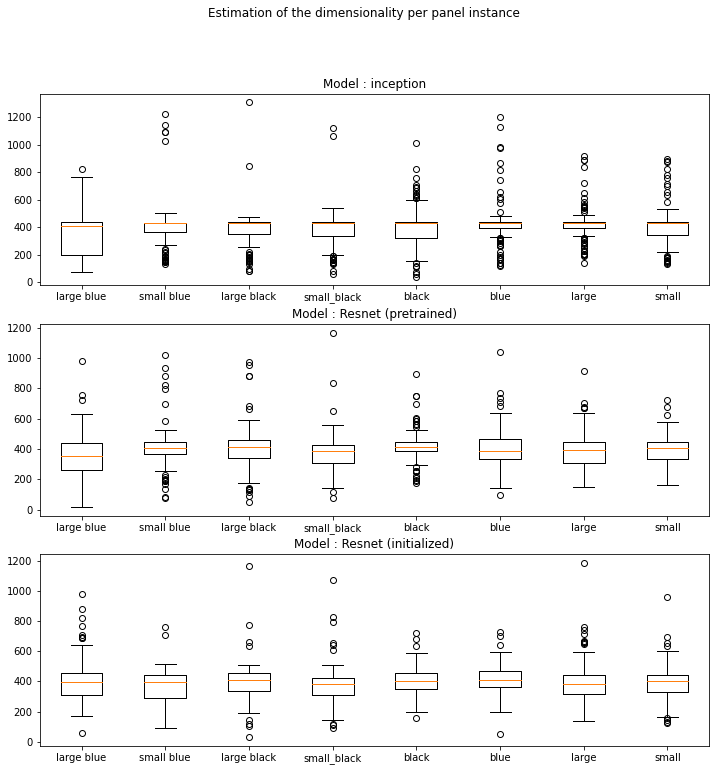

In [17]:
fig, ax = plt.subplots(3,1, figsize = (12,12))

# FIG 1 
# Size of the array encoding depending on the type of array
# We only consider the first coordinate of the dimensionality estimations
lb_inception, _, _ = filter_dimensions(figure_1['LB']['inception'])
lb_resnet_pre, _, _ = filter_dimensions(figure_1['LB']['resnet_pretrained'])
lb_resnet_rand, _, _ = filter_dimensions(figure_1['LB']['resnet_random'])

sb_inception, _, _ = filter_dimensions(figure_1['SB']['inception'])
sb_resnet_pre, _, _ = filter_dimensions(figure_1['SB']['resnet_pretrained'])
sb_resnet_rand, _, _ = filter_dimensions(figure_1['SB']['resnet_random'])

ln_inception, _, _ = filter_dimensions(figure_1['LN']['inception'])
ln_resnet_pre, _, _ = filter_dimensions(figure_1['LN']['resnet_pretrained'])
ln_resnet_rand, _, _ = filter_dimensions(figure_1['LN']['resnet_random'])

sn_inception, _, _ = filter_dimensions(figure_1['SN']['inception'])
sn_resnet_pre, _, _ = filter_dimensions(figure_1['SN']['resnet_pretrained'])
sn_resnet_rand, _, _ = filter_dimensions(figure_1['SN']['resnet_random'])

black_inception, _, _ = filter_dimensions(figure_1['black']['inception'])
black_resnet_pre, _, _ = filter_dimensions(figure_1['black']['resnet_pretrained'])
black_resnet_rand, _, _ = filter_dimensions(figure_1['black']['resnet_random'])

blue_inception, _, _ = filter_dimensions(figure_1['blue']['inception'])
blue_resnet_pre, _, _ = filter_dimensions(figure_1['blue']['resnet_pretrained'])
blue_resnet_rand, _, _ = filter_dimensions(figure_1['blue']['resnet_random'])

large_inception, _, _ = filter_dimensions(figure_1['large']['inception'])
large_resnet_pre, _, _ = filter_dimensions(figure_1['large']['resnet_pretrained'])
large_resnet_rand, _, _ = filter_dimensions(figure_1['large']['resnet_random'])

small_inception, _, _ = filter_dimensions(figure_1['small']['inception'])
small_resnet_pre, _, _ = filter_dimensions(figure_1['small']['resnet_pretrained'])
small_resnet_rand, _, _ = filter_dimensions(figure_1['small']['resnet_random'])

plt.suptitle('Estimation of the dimensionality per panel instance')


ax[0].boxplot([lb_inception, sb_inception, ln_inception, sn_inception, black_inception, blue_inception, large_inception, small_inception])
ax[0].set_title('Model : inception')
ax[0].set_xticks([i for i in range(1,9)]) # values
ax[0].set_xticklabels(['large blue', 'small blue', 'large black', 'small_black', 'black', 'blue', 'large', 'small']) 

ax[1].boxplot([lb_resnet_pre, sb_resnet_pre, ln_resnet_pre, sn_resnet_pre, black_resnet_pre, blue_resnet_pre, large_resnet_pre, small_resnet_pre])
ax[1].set_title('Model : Resnet (pretrained)')
ax[1].set_xticks([i for i in range(1,9)]) # values
ax[1].set_xticklabels(['large blue', 'small blue', 'large black', 'small_black', 'black', 'blue', 'large', 'small']) 

ax[2].boxplot([lb_resnet_rand, sb_resnet_rand, ln_resnet_rand, sn_resnet_rand, black_resnet_rand, blue_resnet_rand, large_resnet_rand, small_resnet_rand])
ax[2].set_title('Model : Resnet (initialized)')
ax[2].set_xticks([i for i in range(1,9)]) # values
ax[2].set_xticklabels(['large blue', 'small blue', 'large black', 'small_black', 'black', 'blue', 'large', 'small']) # labels

plt.savefig('figs/figure_1.pdf')
plt.show()


### Figure 2

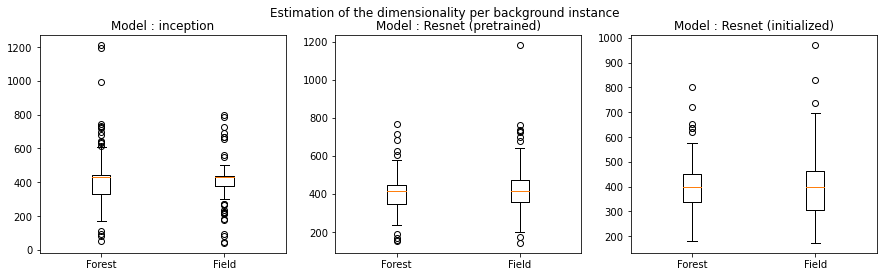

In [20]:
fig, ax = plt.subplots(1,3, figsize = (15,4))

# FIG 1 
# Size of the array encoding depending on the type of array
# We only consider the first coordinate of the dimensionality estimations
_, forest_inception, _ = filter_dimensions(figure_2['forest']['inception'])
_, forest_resnet_pre, _ = filter_dimensions(figure_2['forest']['resnet_pretrained'])
_, forest_resnet_rand, _ = filter_dimensions(figure_2['forest']['resnet_random'])

_, field_inception, _ = filter_dimensions(figure_2['field']['inception'])
_, field_resnet_pre, _ = filter_dimensions(figure_2['field']['resnet_pretrained'])
_, field_resnet_rand, _ = filter_dimensions(figure_2['field']['resnet_random'])

plt.suptitle('Estimation of the dimensionality per background instance')


ax[0].boxplot([forest_inception, field_inception])
ax[0].set_title('Model : inception')
ax[0].set_xticks([1, 2]) # values
ax[0].set_xticklabels(['Forest', 'Field']) 

ax[1].boxplot([forest_resnet_pre, field_resnet_pre])
ax[1].set_title('Model : Resnet (pretrained)')
ax[1].set_xticks([1, 2]) # values
ax[1].set_xticklabels(['Forest', 'Field']) 

ax[2].boxplot([forest_resnet_rand, field_resnet_rand])
ax[2].set_title('Model : Resnet (initialized)')
ax[2].set_xticks([1, 2]) # values
ax[2].set_xticklabels(['Forest', 'Field']) 

plt.savefig('figs/figure_2.pdf')
plt.show()
